In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2024-05-02 15:52:49.827674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 15:52:49.827780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 15:52:49.970036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(xtr, ytr), (xt, yt) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
xtr = xtr.reshape((xtr.shape[0], 28, 28, 1)).astype('float32') / 255
xt = xt.reshape((xt.shape[0], 28, 28, 1)).astype('float32') / 255

ytr = to_categorical(ytr)
yt = to_categorical(yt)

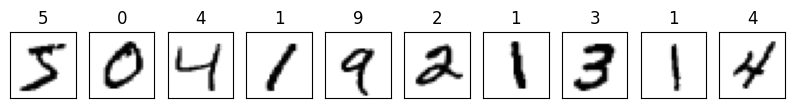

In [5]:
num_classes = yt.shape[1]
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
    ax[i].xaxis.set_visible(False) 
    ax[i].yaxis.set_visible(False) 
    ax[i].set_title(y_train1[i]) 
    ax[i].imshow(x_train[i], cmap=plt.cm.binary)

In [6]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (5,5), padding='valid'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(1152, 'relu'),
    Dense(256, 'relu'),
    Dense(10, 'softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1152)           │     5,309,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,608,138 (21.39 MB)

 Trainable params: 5,608,138 (21.39 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(xtr, ytr, validation_data=(xt, yt), epochs=10, batch_size=200, verbose=2)
model.evaluate(xt, yt, verbose=0)

Epoch 1/10


I0000 00:00:1714665187.623551     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 - 7s - 23ms/step - accuracy: 0.9431 - loss: 0.1857 - val_accuracy: 0.9753 - val_loss: 0.0721
Epoch 2/10
300/300 - 1s - 4ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9830 - val_loss: 0.0602
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9885 - loss: 0.0357 - val_accuracy: 0.9848 - val_loss: 0.0470
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9829 - val_loss: 0.0569
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9848 - val_loss: 0.0536
Epoch 6/10
300/300 - 1s - 4ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9842 - val_loss: 0.0510
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9872 - val_loss: 0.0446
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9858 - val_loss: 0.0553
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9861 - val_loss: 0.0565
Epoch 10/10

W0000 00:00:1714665201.589152     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714665202.495450     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.06248452886939049, 0.9846000075340271]

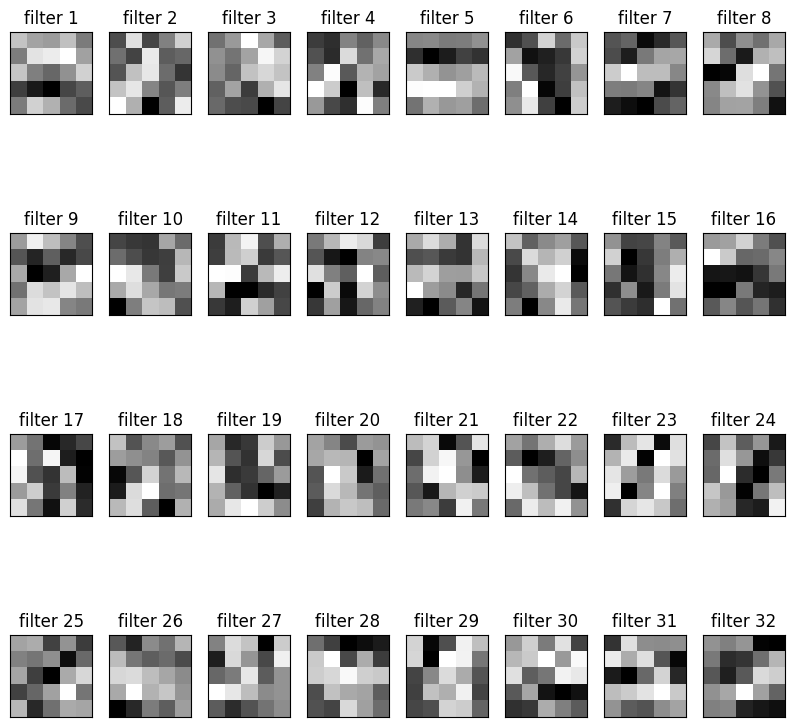

array([[ 6.14647418e-02, -8.55613425e-02, -4.73679677e-02,
        -7.69236833e-02, -1.83662139e-02, -8.18524957e-02,
        -3.29804420e-02,  3.27173285e-02,  1.07488092e-02,
        -7.23123848e-02, -8.01239833e-02, -3.72751523e-03,
         3.28408144e-02,  6.33502230e-02,  1.83933582e-02,
         3.59204449e-02,  1.39707886e-02,  8.38039368e-02,
         3.13132890e-02,  3.20001505e-02,  3.76918390e-02,
         2.29068007e-02, -8.68129730e-02, -6.18340410e-02,
         2.14451924e-02, -6.65920302e-02, -1.83066763e-02,
        -2.55393032e-02,  5.58277331e-02,  8.88094120e-03,
        -7.18908906e-02,  4.26840335e-02],
       [ 1.95636023e-02,  8.27216208e-02, -2.56789778e-03,
        -9.23858359e-02, -1.47823729e-02, -5.10113686e-02,
        -1.16901807e-02, -5.67350909e-02,  8.69992003e-02,
        -8.76796916e-02,  5.61007522e-02,  4.50579971e-02,
         7.21959397e-02, -3.91788892e-02, -4.85552438e-02,
         4.19529267e-02, -8.73904210e-03, -8.02725479e-02,
        -8.22

In [9]:
w, b = model.layers[0].get_weights()
w = w.reshape(5, 5, 32)

#more here:
#https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

plt.figure(figsize = (10,10))
for i in range(4):
    for j in range(8):
        plt.subplot(4, 8, i * 8 + j + 1)
        p = plt.imshow(w[:, :, i*8+j], 'gray')
        p.axes.get_xaxis().set_visible(False)
        p.axes.get_yaxis().set_visible(False)
        plt.title('filter ' + str(i*8+j+1))

plt.show()
w[0]